In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "text.color": "black"}

plt.rcParams.update(params)

In [2]:
## criando uma figura vazia

plt.figure(figsize=(20,15));

<Figure size 1440x1080 with 0 Axes>

In [6]:
## lendo o dataset

df = pd.read_csv('./data/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


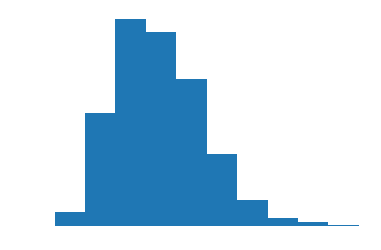

In [7]:
## criando um grafico

plt.figure()
plt.hist(df.AveragePrice)
plt.show()

In [8]:
## agrupando os dados necessários

data = (
    
    df.loc[:,['year','AveragePrice']]
    .groupby('year')
    .mean()

)

In [9]:
## criando o array de valores necessarios para o tamanho do plt.bar

tamanho = data.values.flatten()
tamanho

array([1.37559038, 1.3386396 , 1.51512758, 1.34753086])

In [10]:
## criando a lista de valores necessarios para os indices do plt.bar

x = list(data.index)
x

[2015, 2016, 2017, 2018]

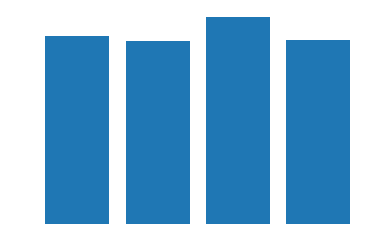

In [11]:
## criando um plt.bar com tamanho e x

plt.figure()
plt.bar(x = x, height= tamanho)
plt.show()

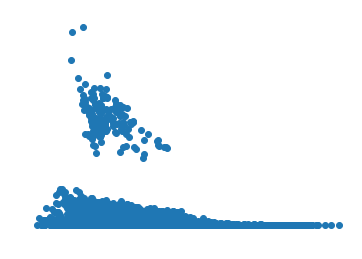

In [12]:
## criando um scatterplot com AvaragePrice

plt.figure()
plt.scatter(x=df['AveragePrice'],y=df['Total Volume'])
plt.show()

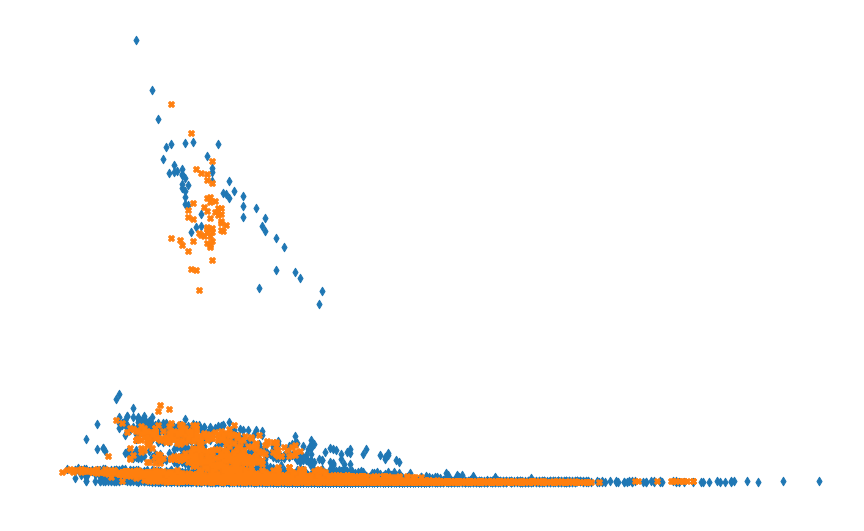

In [13]:
## adicionando dois dados num só grafico, adicionando cor, adicionando marcadores

plt.figure(figsize=(15,9))
plt.scatter(x = df[df.year == 2016].AveragePrice, y = df[df.year == 2016]['Total Volume'], 
            c = 'tab:blue' , marker = 'd' )
plt.scatter(x = df[df.year == 2015].AveragePrice, y = df[df.year == 2015]['Total Volume'], 
            c = 'tab:orange' , marker = 'X' )
plt.show()

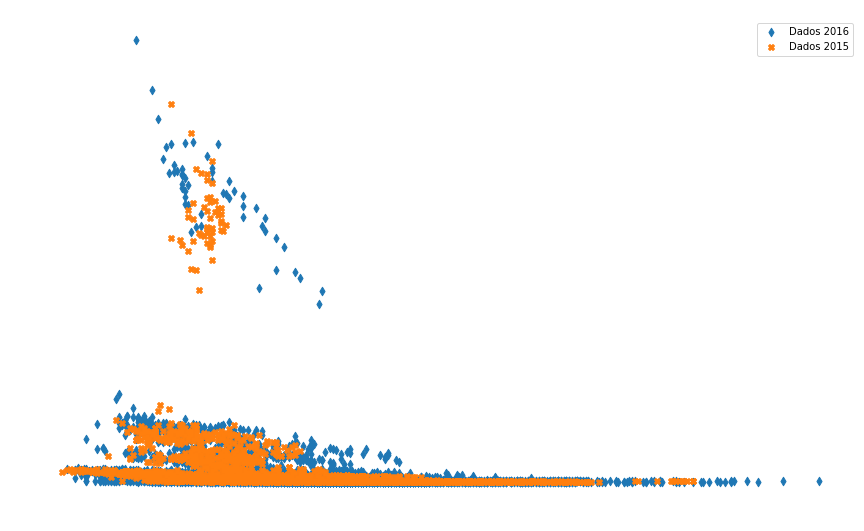

In [14]:
## adicionando legendas

plt.figure(figsize=(15,9))
plt.scatter(x = df[df.year == 2016].AveragePrice, y = df[df.year == 2016]['Total Volume'], 
            c = 'tab:blue' , marker = 'd' , label='Dados 2016')
plt.scatter(x = df[df.year == 2015].AveragePrice, y = df[df.year == 2015]['Total Volume'], 
            c = 'tab:orange' , marker = 'X', label='Dados 2015')

plt.legend()
plt.show()

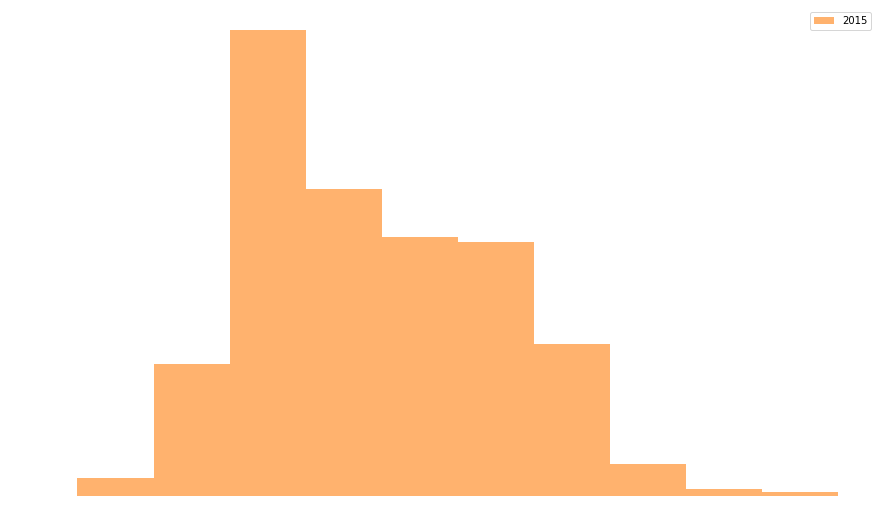

In [15]:
## criando um histograma

plt.figure(figsize=(15,9))
plt.hist(x = df[df['year'] == 2015]['AveragePrice'],color='tab:orange',alpha=0.6,label='2015')
plt.legend()
plt.show()

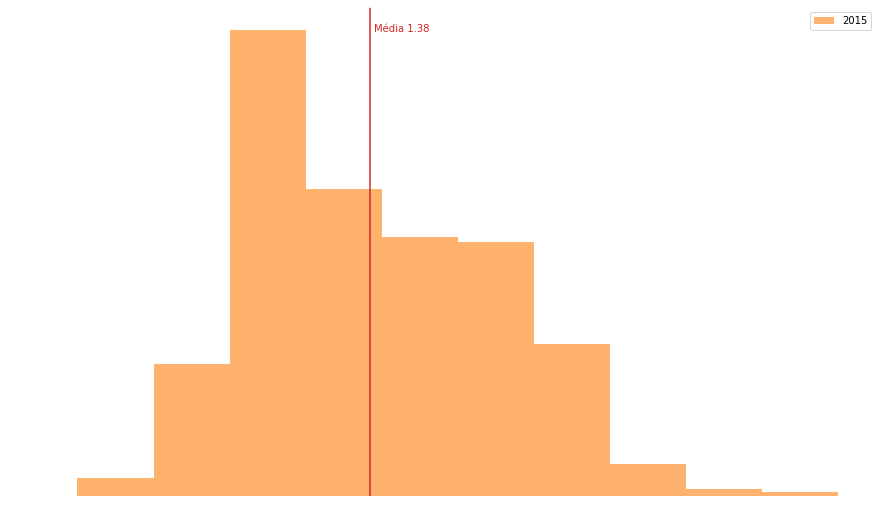

In [16]:
## encontrado a media dos valores

media = df[df['year'] == 2015]['AveragePrice'].mean()

plt.figure(figsize=(15,9))
plt.hist(x = df[df['year'] == 2015]['AveragePrice'],color='tab:orange',alpha=0.6,label='2015')
plt.axvline(x = media ,color='tab:red')
plt.text(x =  media + 0.01, y = 1600, s = f'Média {round(media,2)}', fontdict = {'color':'tab:red'})

plt.legend()
plt.show()

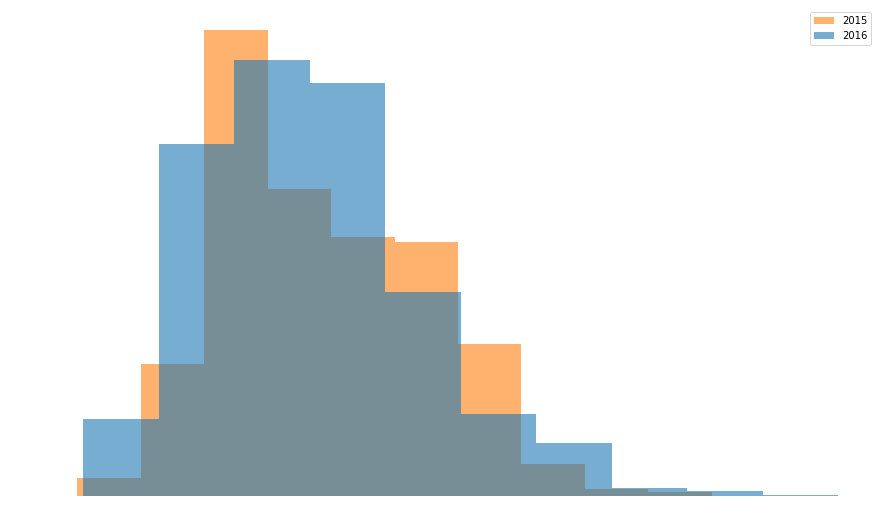

In [17]:
## criando mais de um histograma na mesma figura

plt.figure(figsize=(15,9))
plt.hist(x = df[df['year'] == 2015]['AveragePrice'],color='tab:orange',alpha=0.6,label='2015')
plt.hist(x = df[df['year'] == 2016]['AveragePrice'],color='tab:blue',alpha=0.6,label='2016')
plt.legend()
plt.show()

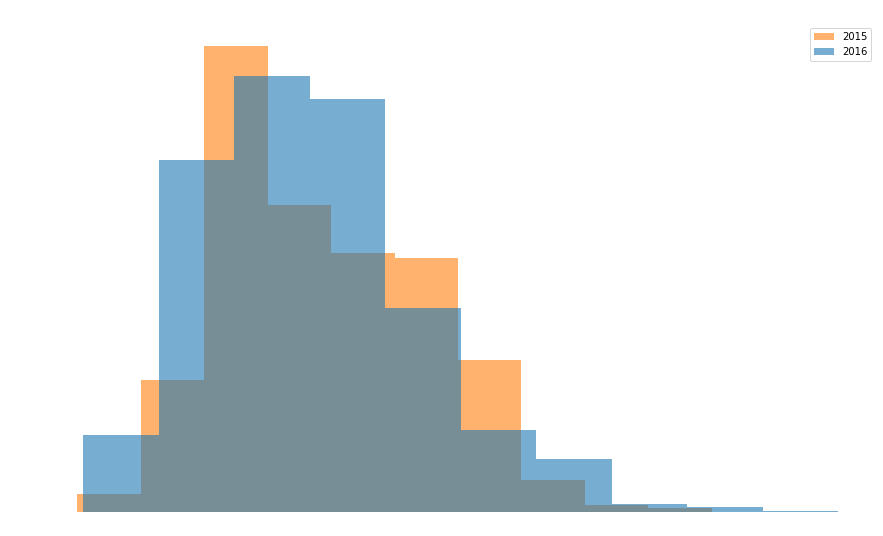

In [18]:
## gerando o gráfico acima com título

plt.figure(figsize=(15,9))
plt.hist(x = df[df['year'] == 2015]['AveragePrice'],color='tab:orange',alpha=0.6,label='2015')
plt.hist(x = df[df['year'] == 2016]['AveragePrice'],color='tab:blue',alpha=0.6,label='2016')
plt.title('AveragePrice 2015 vs. 2016',fontdict={'color':'white'})
plt.legend()
plt.show()

In [19]:
## gerando os dados necessários para o próximo gráfico

dados = (


  df[['Date','Total Bags','year','region']]
  .query('year == 2015')
  .query("region == 'LasVegas'")
  .drop(['year','region'],axis=1)
  .assign(Date = lambda x: pd.to_datetime(x.Date,infer_datetime_format=True))
  .sort_values('Date')


)

print(dados.shape)
dados

(104, 2)


,Date,Total Bags
1143,2015-01-04,58638.68
10269,2015-01-04,457.12
10268,2015-01-11,33.33
1142,2015-01-11,37144.36
1141,2015-01-18,33175.55
...,...,...
10220,2015-12-13,509.14
1093,2015-12-20,54103.94
10219,2015-12-20,407.88
10218,2015-12-27,1015.50


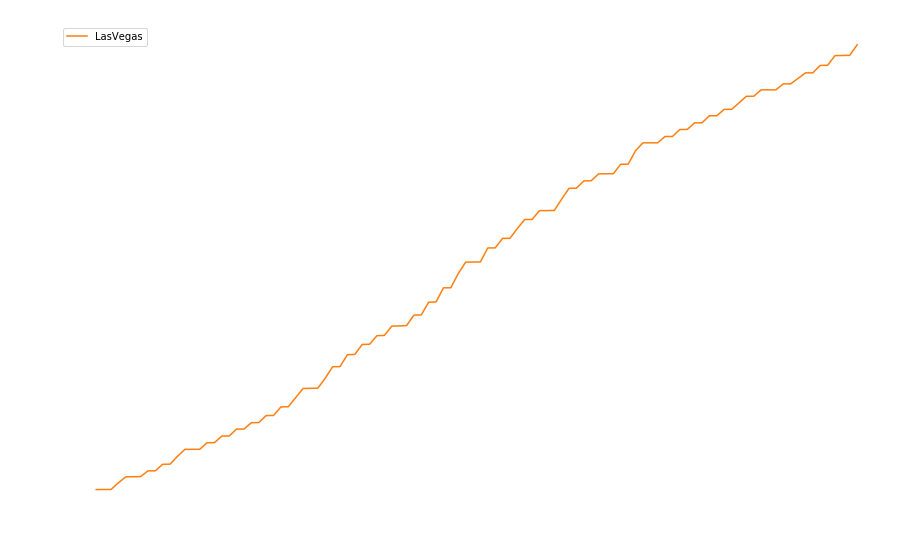

In [20]:
## gerando o gráfico de linhas com a soma cumulativa

soma_cumulativa = dados['Total Bags'].cumsum()

plt.figure(figsize=(15,9))
plt.plot(range(104),soma_cumulativa,color='tab:orange',label='LasVegas')
plt.title('AveragePrice 2015 vs. 2016',fontdict={'color':'white'})
plt.legend()
plt.show()

In [21]:
## definindo os dados de albany

dados_albany = (


  df[['Date','Total Bags','year','region']]
  .query('year == 2015')
  .query("region == 'Albany'")
  .drop(['year','region'],axis=1)
  .assign(Date = lambda x: pd.to_datetime(x.Date,infer_datetime_format=True))
  .sort_values('Date')


)

print(dados_albany.shape)
dados

(104, 2)


,Date,Total Bags
1143,2015-01-04,58638.68
10269,2015-01-04,457.12
10268,2015-01-11,33.33
1142,2015-01-11,37144.36
1141,2015-01-18,33175.55
...,...,...
10220,2015-12-13,509.14
1093,2015-12-20,54103.94
10219,2015-12-20,407.88
10218,2015-12-27,1015.50


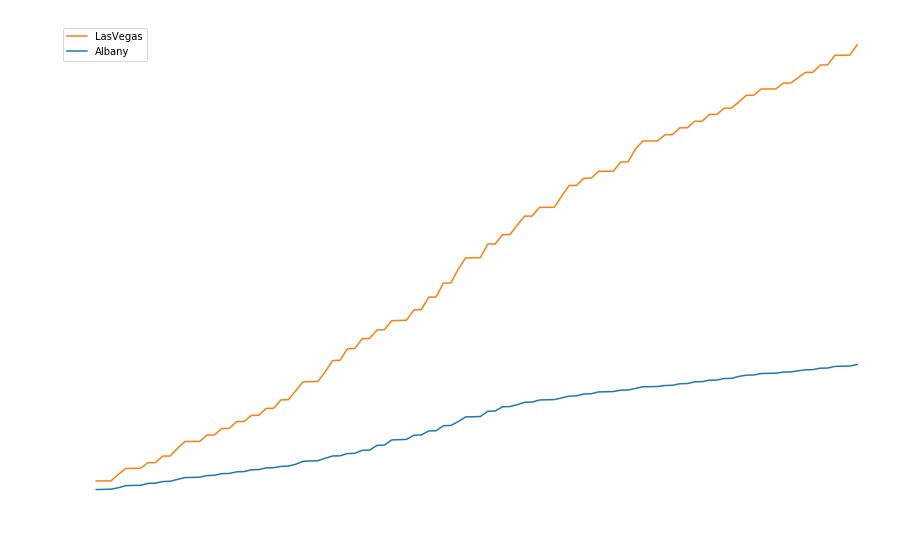

In [22]:
## gerando o gráfico de linhas com a soma cumulativa

soma_cumulativa = dados['Total Bags'].cumsum()
soma_cumulativa_albany = dados_albany['Total Bags'].cumsum()

plt.figure(figsize=(15,9))
plt.plot(range(104),soma_cumulativa,color='tab:orange',label='LasVegas')
plt.plot(range(104),soma_cumulativa_albany,color='tab:blue',label='Albany')
plt.title('Total Bags LasVegas vs Albany (2015)',fontdict={'color':'white'})
plt.legend()
plt.show()

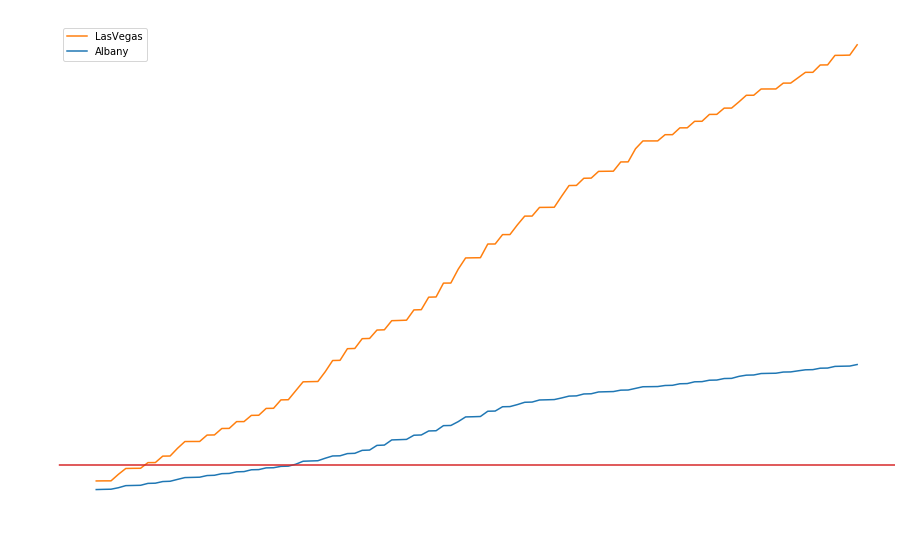

In [23]:
## adicionando uma linha horizontal no valor 150000

soma_cumulativa = dados['Total Bags'].cumsum()
soma_cumulativa_albany = dados_albany['Total Bags'].cumsum()

plt.figure(figsize=(15,9))
plt.plot(range(104),soma_cumulativa,color='tab:orange',label='LasVegas')
plt.plot(range(104),soma_cumulativa_albany,color='tab:blue',label='Albany')
plt.title('Total Bags LasVegas vs Albany (2015)',fontdict={'color':'white'})

plt.axhline(y=150000,color='tab:red')

plt.legend()
plt.show()

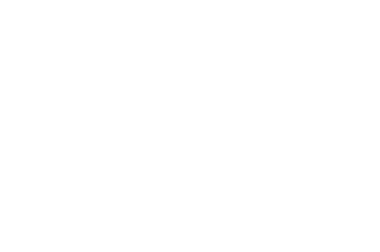

In [24]:
## criando um subplot vazio

plt.subplots()
plt.show()

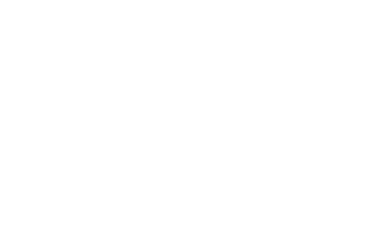

In [25]:
## criando um subplot com 6 axes (2 linhas e 2 colunas)

plt.subplots(2,2)
plt.show()

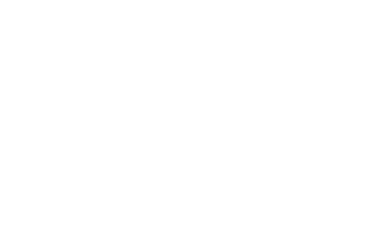

In [26]:
## guardando os retornos em varíaveis que podemos acessar e controlar

f, ax = plt.subplots(2,2)
plt.show()

In [27]:
## verificando o tipo de f e ax

print(type(f))
print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>


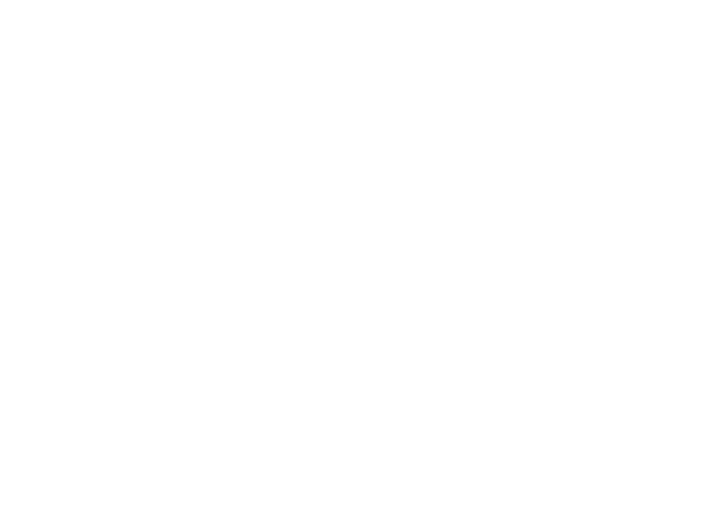

In [28]:
## aumentado o tamanho do subplots

f, ax = plt.subplots(2,2,figsize=(12,9))
plt.show()

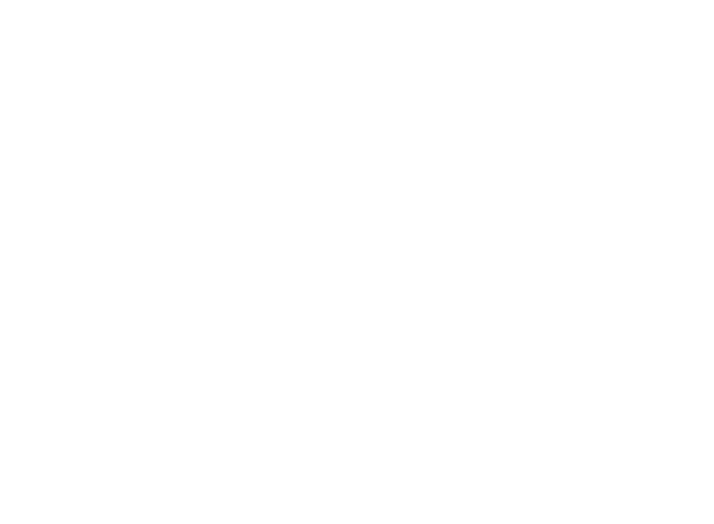

In [29]:
## compartilhando os eixos y

f, ax = plt.subplots(2,2,figsize=(12,9),sharey=True)
plt.show()

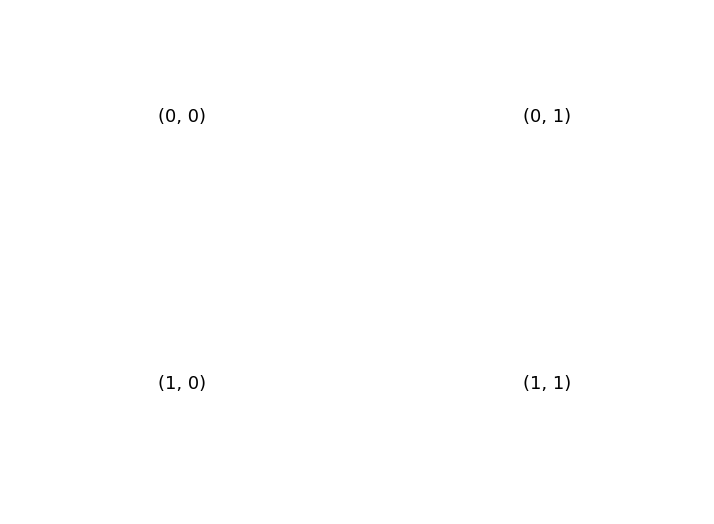

In [30]:
## acessando os gráficos e adicionando os textos

f, ax = plt.subplots(2,2,figsize=(12,9),sharey=True)


for i in range(2):
  for j in range(2):
    ax[i,j].text(0.5, 0.5, str((i, j)),fontsize=18, ha='center')


plt.show()

In [31]:
## definindo os dados que vamos usar
subplot_data = df[['AveragePrice','year']]
subplot_data

,AveragePrice,year
0,1.33,2015
1,1.35,2015
2,0.93,2015
3,1.08,2015
4,1.28,2015
...,...,...
18244,1.63,2018
18245,1.71,2018
18246,1.87,2018
18247,1.93,2018


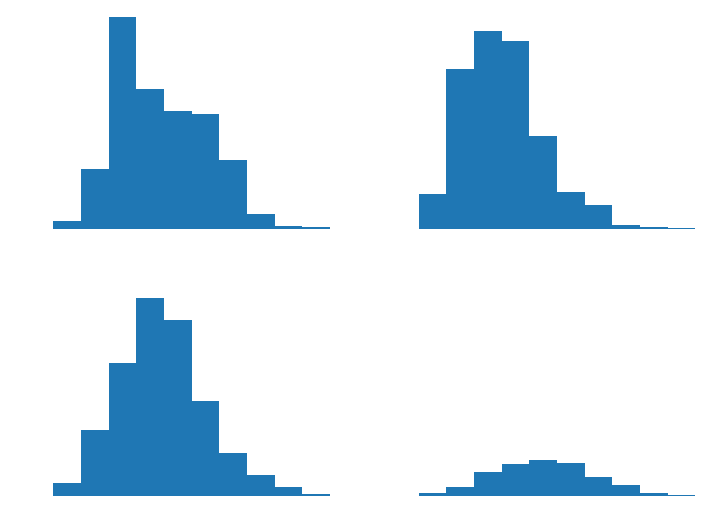

In [32]:
## criando os gráficos em cada um dos eixos

f, ax = plt.subplots(2,2,figsize=(12,9),sharey=True)

ax[0,0].hist(subplot_data.query('year == 2015').AveragePrice)
ax[0,1].hist(subplot_data.query('year == 2016').AveragePrice)
ax[1,0].hist(subplot_data.query('year == 2017').AveragePrice)
ax[1,1].hist(subplot_data.query('year == 2018').AveragePrice)

plt.show()

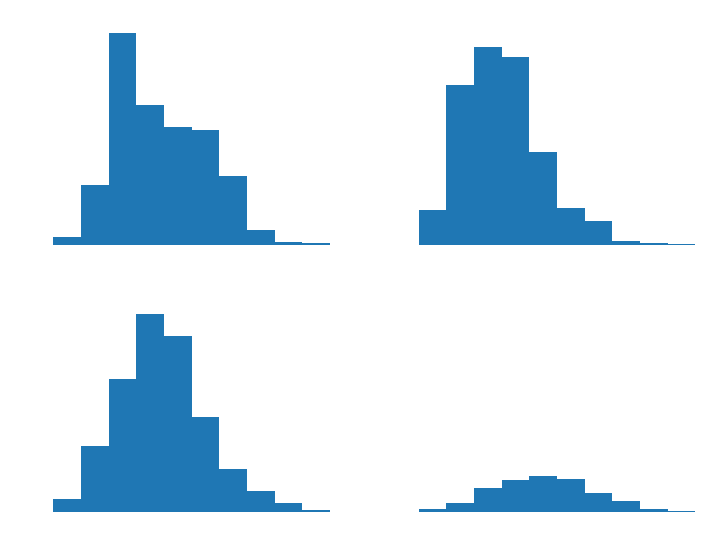

In [33]:
## adicionando titulos

f, ax = plt.subplots(2,2,figsize=(12,9),sharey=True)

ax[0,0].hist(subplot_data.query('year == 2015').AveragePrice)
ax[0,0].set_title('Average Price 2015',fontdict={'color':'white'})

ax[0,1].hist(subplot_data.query('year == 2016').AveragePrice)
ax[0,1].set_title('Average Price 2016',fontdict={'color':'white'})

ax[1,0].hist(subplot_data.query('year == 2017').AveragePrice)
ax[1,0].set_title('Average Price 2017',fontdict={'color':'white'})

ax[1,1].hist(subplot_data.query('year == 2018').AveragePrice)
ax[1,1].set_title('Average Price 2018',fontdict={'color':'white'})

plt.show()

In [34]:
## importando o modulo image

import matplotlib.image as mpimg

In [35]:
## abrindo a imagem

img = mpimg.imread('./data/ceu.jpeg')
img

array([[[ 58,  58,  92],
        [ 56,  56,  90],
        [ 55,  55,  89],
        ...,
        [ 22,  27,  56],
        [ 22,  27,  56],
        [ 22,  27,  56]],

       [[ 58,  58,  92],
        [ 57,  57,  91],
        [ 56,  56,  90],
        ...,
        [ 23,  28,  57],
        [ 23,  28,  57],
        [ 23,  28,  57]],

       [[ 59,  59,  93],
        [ 58,  58,  92],
        [ 57,  57,  91],
        ...,
        [ 22,  29,  58],
        [ 22,  29,  58],
        [ 22,  29,  58]],

       ...,

       [[ 85,  53,  38],
        [ 91,  59,  44],
        [ 94,  62,  47],
        ...,
        [ 58,  55,  62],
        [ 52,  50,  55],
        [ 47,  45,  50]],

       [[ 97,  66,  45],
        [106,  75,  54],
        [109,  78,  58],
        ...,
        [ 69,  64,  70],
        [ 65,  60,  66],
        [ 62,  57,  61]],

       [[104,  70,  58],
        [113,  79,  67],
        [118,  84,  72],
        ...,
        [ 42,  41,  55],
        [ 44,  43,  57],
        [ 46,  46,  58]]

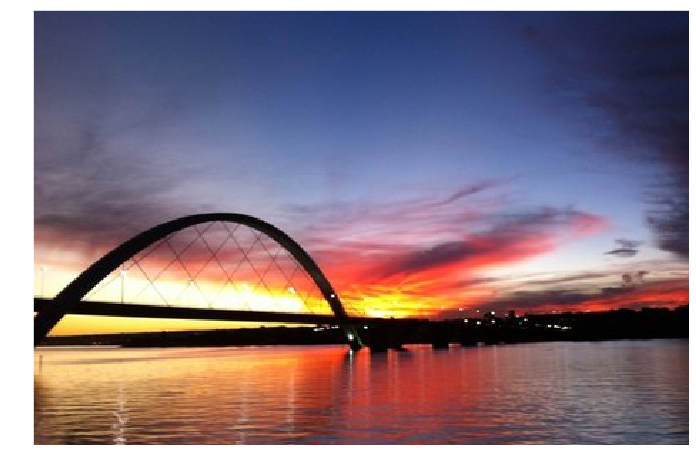

In [36]:
## abrindo o array com a imagem

plt.figure(figsize=(15,8))
plt.imshow(img)
plt.show()

In [37]:
## pequena reconfiguracao de paramentros para plotar textos na cor preta.

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.color": "black"}

plt.rcParams.update(params)

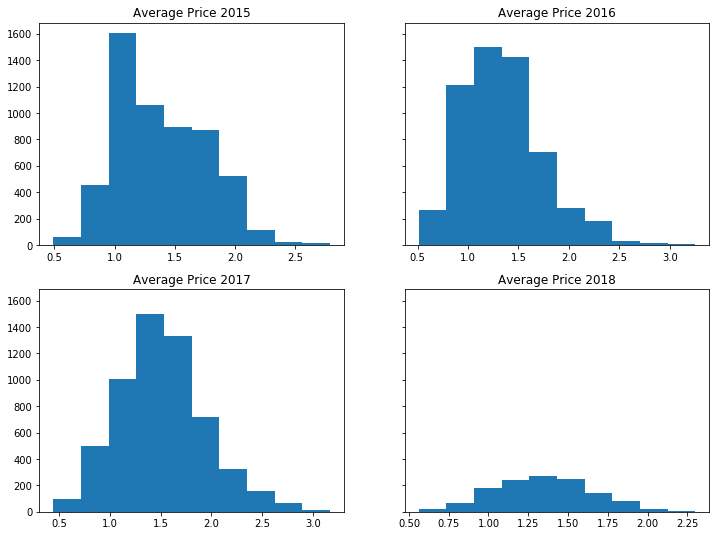

In [38]:
## salvando o subplot

f, ax = plt.subplots(2,2,figsize=(12,9),sharey=True)

ax[0,0].hist(subplot_data.query('year == 2015').AveragePrice)
ax[0,0].set_title('Average Price 2015',fontdict={'color':'black'})

ax[0,1].hist(subplot_data.query('year == 2016').AveragePrice)
ax[0,1].set_title('Average Price 2016',fontdict={'color':'black'})

ax[1,0].hist(subplot_data.query('year == 2017').AveragePrice)
ax[1,0].set_title('Average Price 2017',fontdict={'color':'black'})

ax[1,1].hist(subplot_data.query('year == 2018').AveragePrice)
ax[1,1].set_title('Average Price 2018',fontdict={'color':'black'})

plt.savefig(fname='subplot_bonitao',format='png')
plt.show()